In [7]:
####################################################################
###    This is the PYTHON version of program 5.3 from page 184 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the simple SIR epidemic with sinusoidal forcing of the   #
### birth rate.				         							   #
### Note: setting beta1 too high can cause numerical difficulties. #
####################################################################

In [8]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

*alpha0 is the mean birth rate.

*alpha1 is the amplitude of sinuoidal forcing for the birth rate.

*We set ω=2π/365, such that oscillations are annual.

*mu is the per capita death rate, and set equal to the average birth rate α0.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.

*S0 is the initial proportion of the population that are susceptible.

*I0 is the initial proportion of the population that are infectious.

In [9]:
beta=17/13.
gamma=1/13.0
alpha0=1/(50*365.0)
alpha1=([0.25])
S0=1/17.
I0=1e-4
ND=MaxTime=60*365
TS=1.0

In [10]:
### This code can also be used to generate bifurcation diagrams, by setting
### beta1 equal to a vector of seasonality rates. The bifurcation diagram is
### constructed using extrapolated initial conditions. Try:
#(beta,gamma,alpha0, alpha1,S0,I0,ND)=(17/13.,1/13., 1./(50*365), np.arange(0.00,1.0,0.01),1/17., 1e-4, 20*365)

In [11]:
INPUT=np.array((S0,I0, 1-S0-I0))

In [12]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP   
	t=np.mod(t,365.)
	alpha=alpha0*(1+alpha1*np.sin(2*np.pi*t/365))
	mu=alpha0
	Y[0] = alpha - beta*V[0]*V[1] - mu*V[0]
	Y[1] = beta*V[0]*V[1] - mu*V[1] - gamma*V[1]
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

[[5.88235294e-02 1.00000000e-04 9.41076471e-01]
 [5.88675223e-02 9.99973986e-05 9.41032598e-01]
 [5.89117428e-02 1.00000565e-04 9.40988728e-01]
 ...
 [5.78396743e-02 6.67037854e-04 9.40937658e-01]
 [5.78405269e-02 6.66144056e-04 9.40937376e-01]
 [5.78416818e-02 6.65252331e-04 9.40937025e-01]]


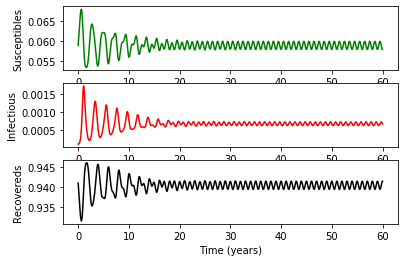

In [13]:
if len(alpha1)==1:
	alpha1=alpha1[0]
	t_start = 0.0; t_end = ND; t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	RES = spi.odeint(diff_eqs,INPUT,t_range)

	print(RES)

	t=(np.arange(ND)/365.)
	#Ploting
	pl.subplot(311)
	pl.plot(t,RES[1:,0], 'g', label='S')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Susceptibles')
	pl.subplot(312)
	pl.plot(t,RES[1:,1], 'r', label='I')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Infectious')
	pl.subplot(313)
	pl.plot(t,1-(RES[1:,0]+RES[1:,1]), 'k', label='R')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Recovereds')

else:
	if ND < 3650:
		ND = 3650
	alpha2=alpha1
	Bifur_I=np.zeros((len(alpha2),10))
	for i in range(len(alpha2)):
		alpha1 = alpha2[i]

		t_start = 0.0; t_end = ND; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES = spi.odeint(diff_eqs,INPUT,t_range)
		INPUT=RES[-1]

		for j in range(10):
			Bifur_I[i,j]=RES[np.arange(ND)[((ND-j*365.)-1)],1]

	### Plotting
	pl.plot (alpha2, np.log10(Bifur_I), '.k')
	### if TeX commands do not work comment comment the next line
	pl.xlabel (r'Seasonality, $\alpha_1$')
	pl.ylabel (r'Level of Infection $(log_{10})$')
	### if TeX commands do not work comment uncomment the next line
#	pl.xlabel ('Seasonality, beta1')
#	pl.ylabel ('Level of Infection (log_10)')
pl.show()